The dataset i chose yesterday was titanic datset but after working on it half way i came to know that logistic regression will give bad model for the given dataset. So today i took the dataset 'pima indians diabetes' to work on for this assignment for logistic regression model.
link:https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# required library 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats

##**1.Data Extraction**

In [3]:
ds=pd.read_csv(r'/content/gdrive/MyDrive/ml datasets/diabetes.csv')
print(ds)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


##**2.Data Exploration**

In [4]:
ds.info() # to find detail about the column 
#to find data type use '.dtypes'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# To get statistics for all the columns at the same time
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [183]:
ds.memory_usage()

Index                        128
Pregnancies                 6144
Glucose                     6144
BloodPressure               6144
SkinThickness               6144
Insulin                     6144
BMI                         6144
DiabetesPedigreeFunction    6144
Age                         6144
Outcome                     6144
dtype: int64

In [6]:
ds.shape # returns a tuple containing the dimensions (rows x columns) of a dataframe.

(768, 9)

In [7]:
# mean DataFrame.mean(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
ds.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [8]:
# meadian DataFrame.median(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)
ds.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [9]:
# mode DataFrame.mode(axis=0, numeric_only=False, dropna=True)
ds.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [10]:
# standard deviation DataFrame.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
ds.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [11]:
# Applying var() to the dataframe returns variance of each columns
ds.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [12]:
ds.skew() #skewness

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [13]:
ds.kurtosis() #kurtosis

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

In [14]:
ds.min()


Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [15]:
ds.max()


Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [17]:
cr = ds.corr() #correlation between two coloumns
print(cr)

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


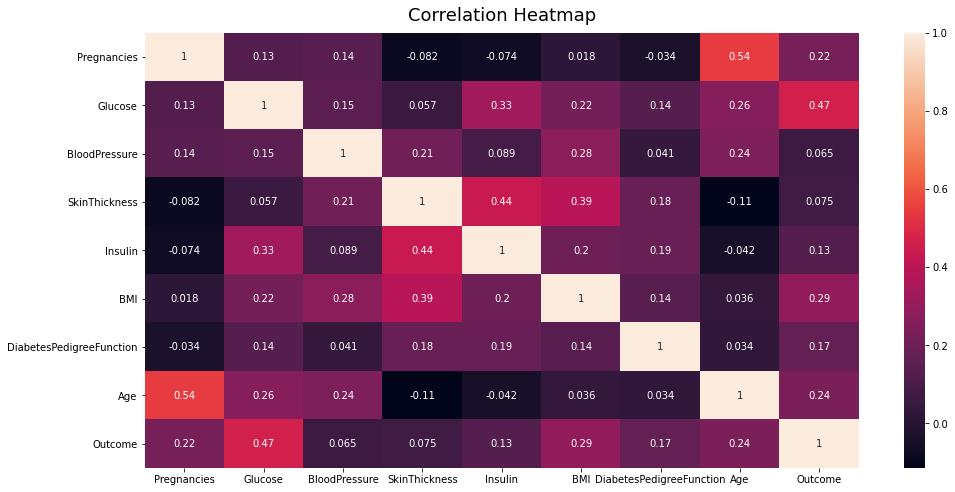

In [22]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(cr, annot = True) # by default pearson correlation
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

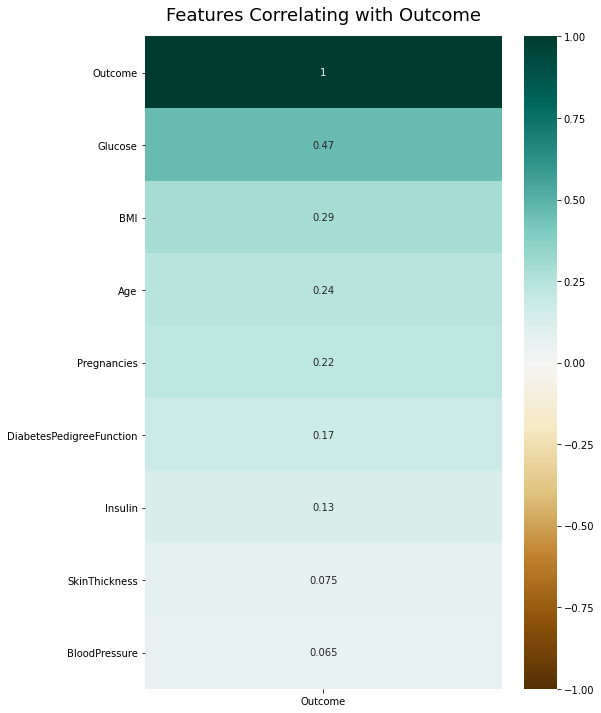

In [26]:
plt.figure(figsize=(8, 12))
heatma = sns.heatmap(ds.corr()[['Outcome']].sort_values(by='Outcome', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatma.set_title('Features Correlating with Outcome', fontdict={'fontsize':18}, pad=16);

Text(0.5, 1.0, 'Outcome:People with/without diabetes')

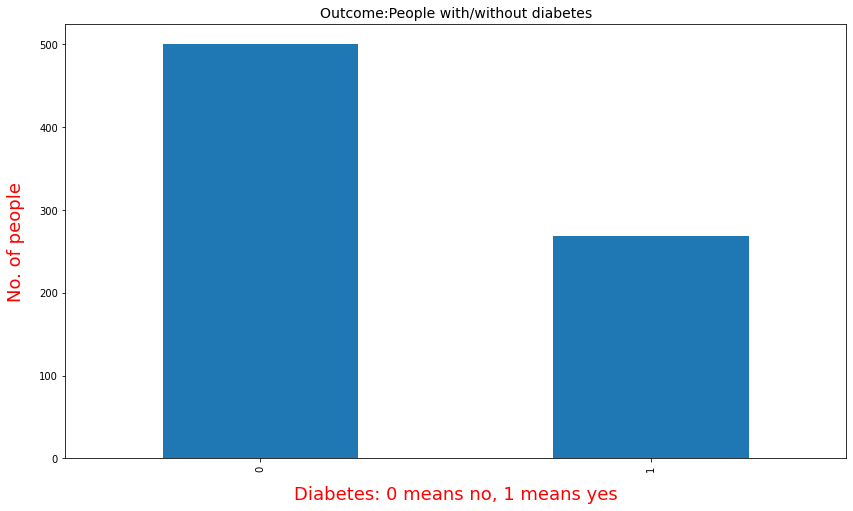

In [45]:
ds["Outcome"].value_counts().plot(kind='bar',figsize=(14,8))
plt.ylabel("No. of people", labelpad=14, fontsize=18, color='red')
plt.xlabel("Diabetes: 0 means no, 1 means yes", labelpad=14, fontsize=18, color='red')
plt.title("Outcome:People with/without diabetes", fontsize=14)

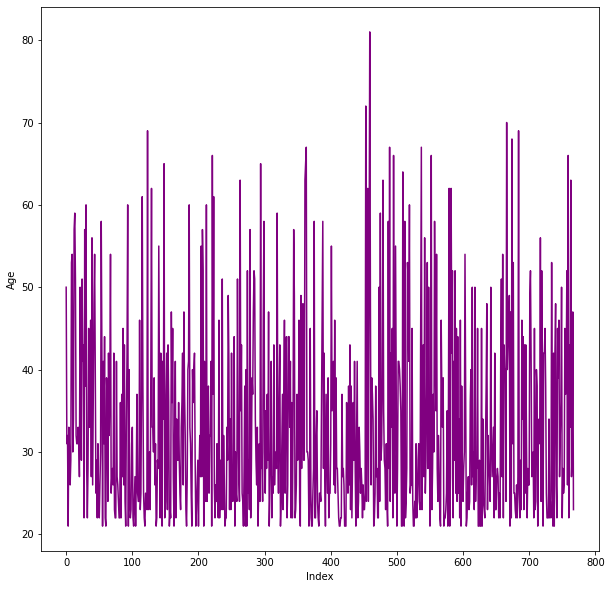

In [187]:
ds['Age'].plot(color='purple')
plt.xlabel('Index')
plt.ylabel('Age')
plt.figsize=(12,5)


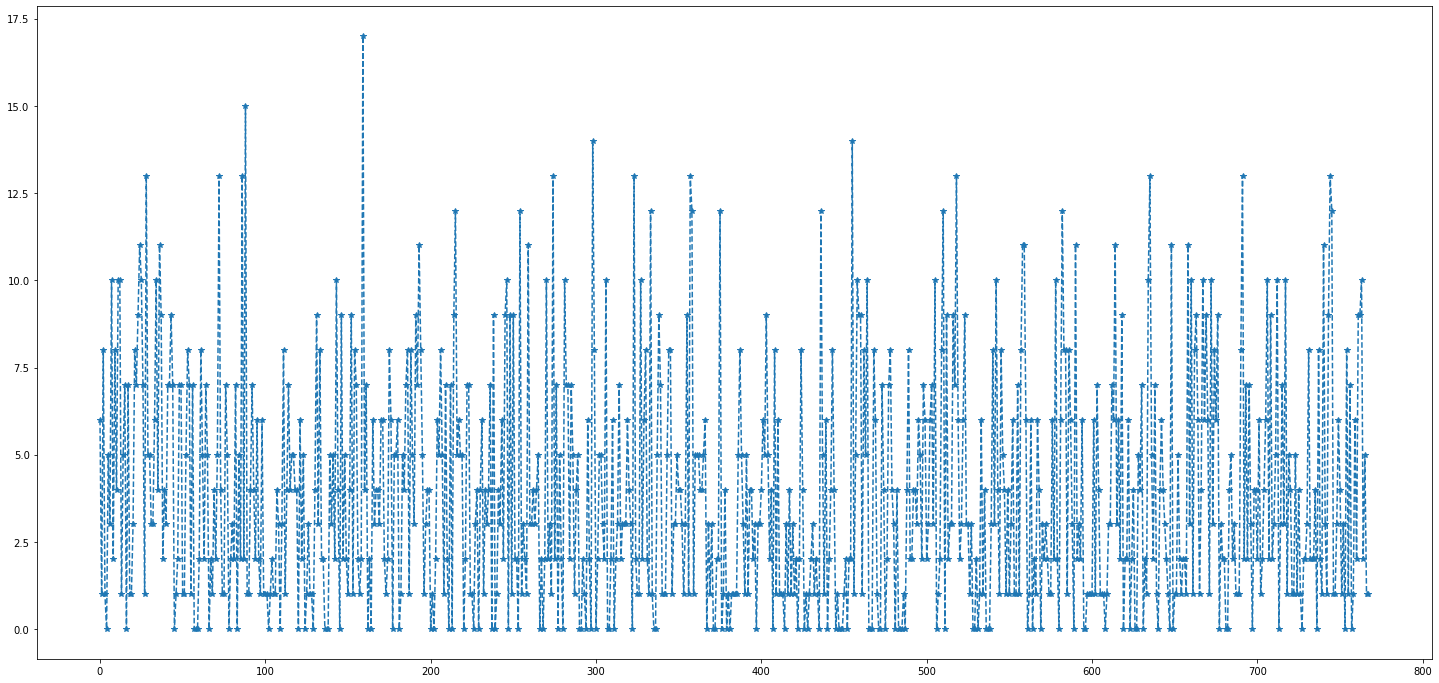

In [66]:
plt.figure(figsize=(25, 12))
plt.plot(ds['Pregnancies'],'*--')

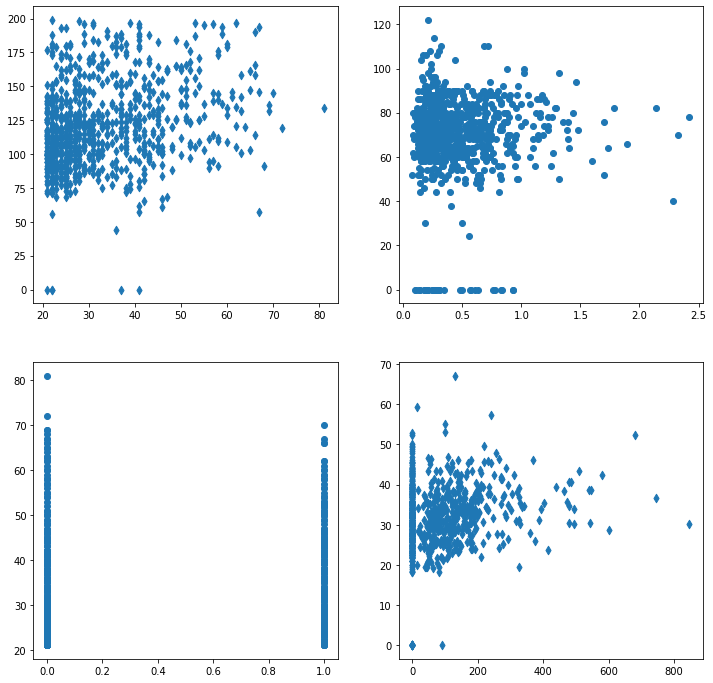

In [120]:
plt.figure(figsize=(12, 12))
# first number = rows, second number = coloumn , third number = current plot
plt.subplot(2, 2, 1)
plt.scatter(ds['Age'],ds['Glucose'],marker='d')
plt.subplot(2, 2, 2)
plt.scatter(ds['DiabetesPedigreeFunction'],ds['BloodPressure'])
plt.subplot(2, 2, 3)
plt.scatter(ds['Outcome'],ds['Age'])
plt.subplot(2, 2, 4)
plt.scatter(ds['Insulin'],ds['BMI'],marker='d')


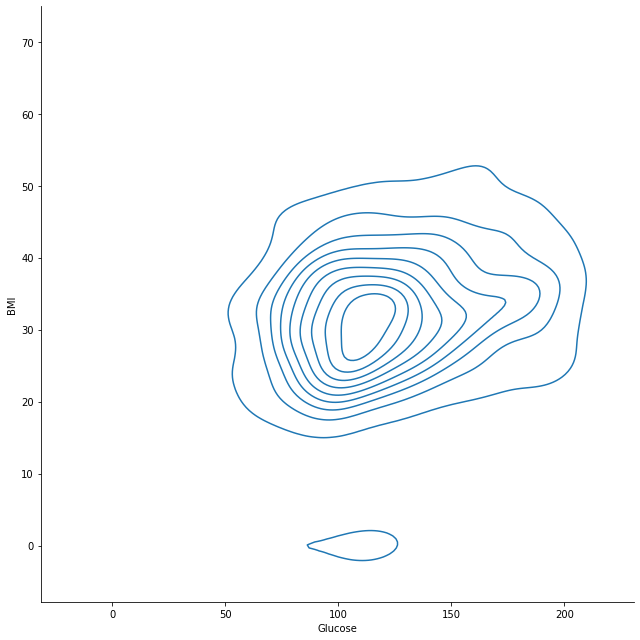

In [67]:
sns.displot(data=ds,x='Glucose',y='BMI',kind='kde',height=9) # kernel density estimates 
plt.show()

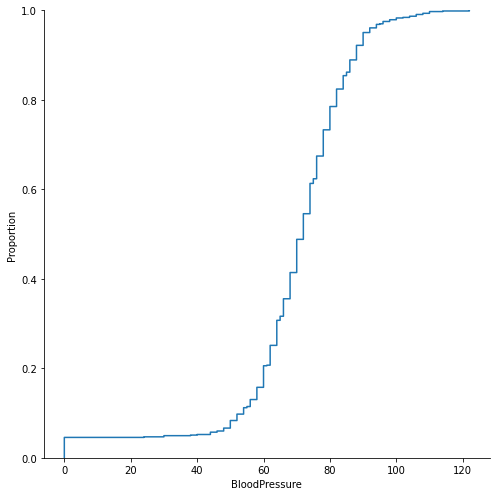

In [69]:
sns.displot(data=ds,x='BloodPressure',kind='ecdf',height=7) # empirical cumulative distribution functions
plt.show()


Text(0.5, 1.0, 'Insulin')

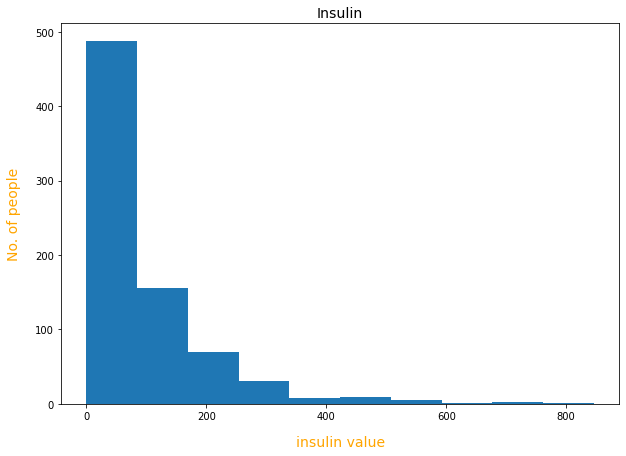

In [76]:
plt.figure(figsize=(10, 7))
ds['Insulin'].plot(kind='hist')
plt.ylabel("No. of people", labelpad=14, fontsize=14, color='orange')
plt.xlabel("insulin value", labelpad=14, fontsize=14, color='orange')
plt.title("Insulin", fontsize=14)

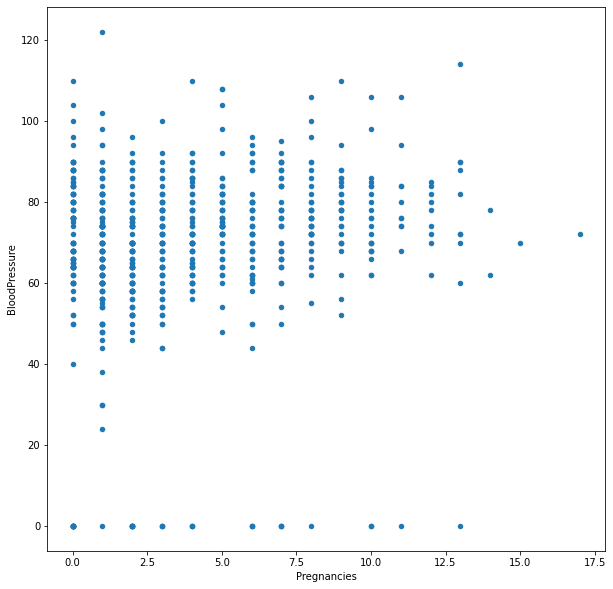

In [105]:
ds.plot(kind = 'scatter', y = 'BloodPressure', x = 'Pregnancies')
plt.show()

In [86]:
ag = pd.cut(ds['Age'], bins=[21, 41, 61, 81])

In [87]:
dk=ds.groupby(ag).Outcome.mean() # grouped the high column data according to year to draw pie chart
print(dk)

Age
(21, 41]    0.326454
(41, 61]    0.564626
(61, 81]    0.240000
Name: Outcome, dtype: float64


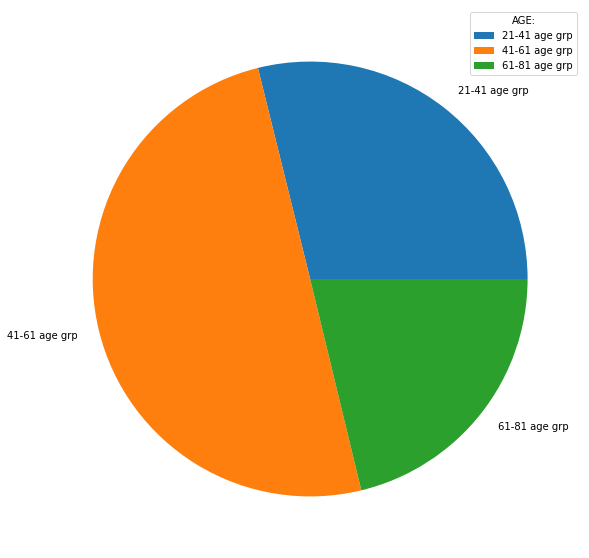

In [96]:
label=['21-41 age grp','41-61 age grp','61-81 age grp']
plt.pie(dk,labels=label)
plt.legend(title = "AGE:")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

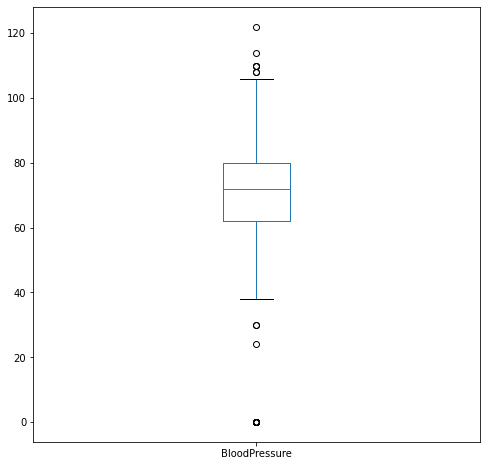

In [106]:
# Box plot of a column
ds['BloodPressure'].plot.box(figsize=(8, 8));

Text(0, 0.5, 'SkinThickness')

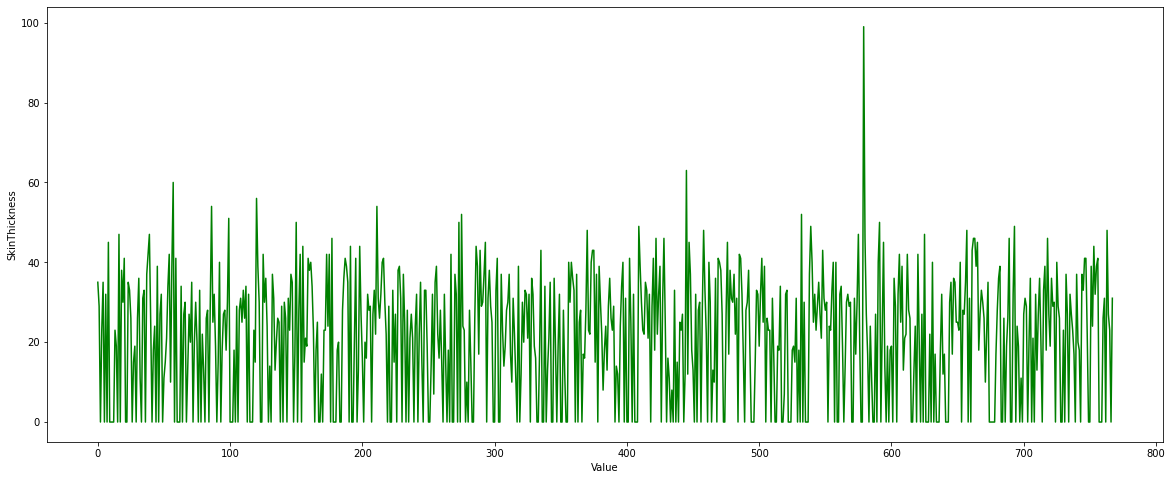

In [101]:
# Plotting with index along the x-axis
ds['SkinThickness'].plot(figsize=(20, 8), color='green') # color and figsize changed
plt.xlabel('Value')
plt.ylabel('SkinThickness') # ";" prevents object info from displaying

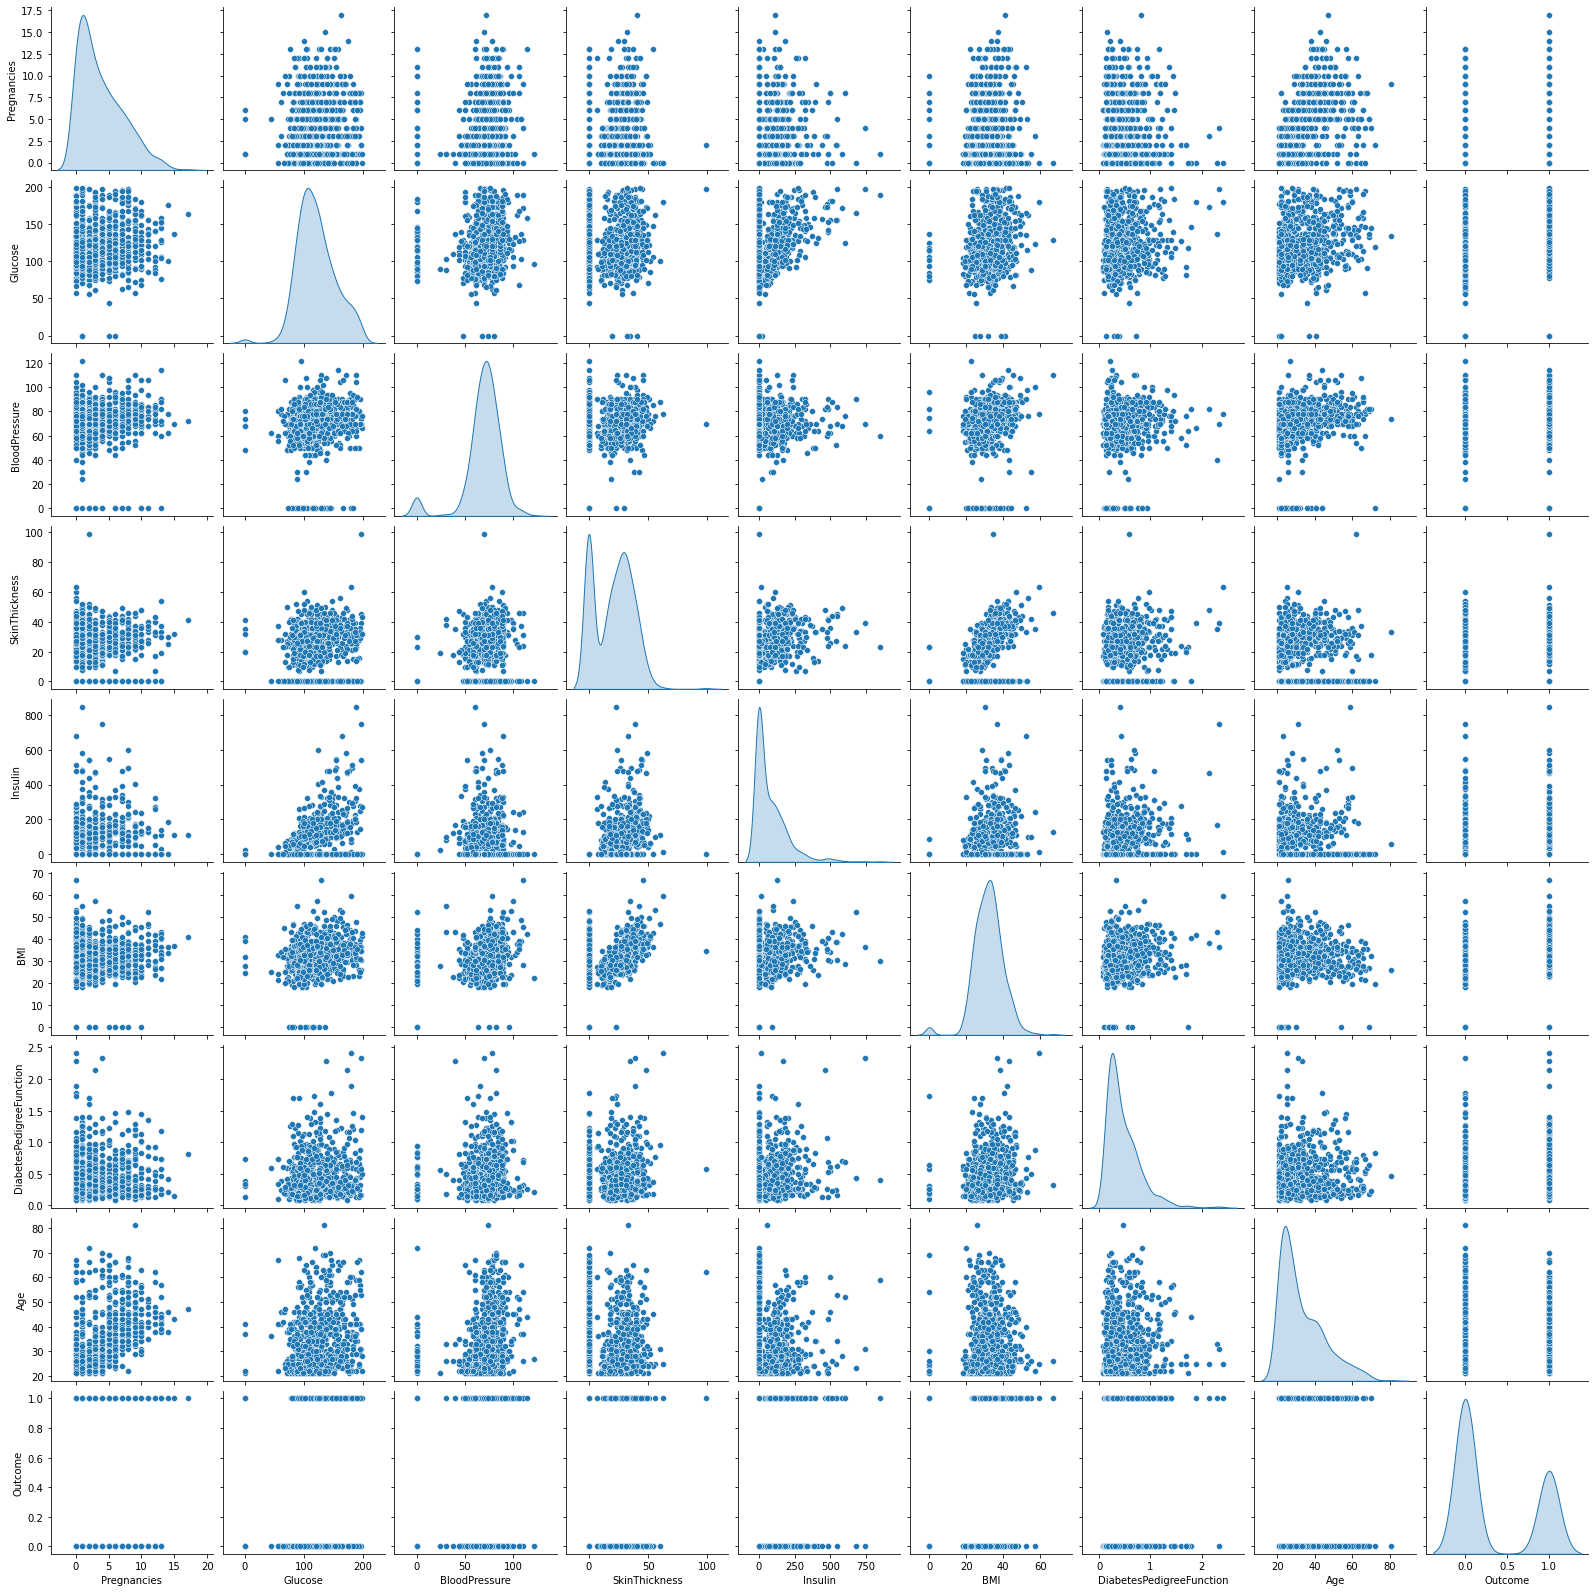

In [109]:
sns.pairplot(ds, diag_kind ='kde')

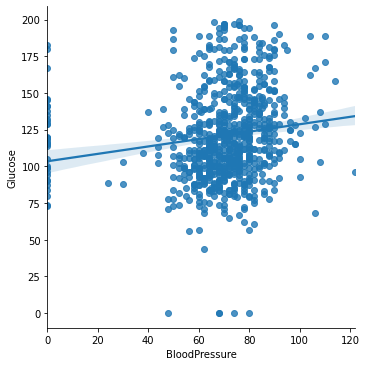

In [124]:
sns.lmplot(x='BloodPressure',y='Glucose',data=ds)

##**3.Data Preparation**

In [107]:
# Let us check whether any of the columns has any value other than #numeric i.e. data is not corrupted such as a “?” instead of
## a number. And also find if there are any columns with 
# null/missing values
print(ds[~ds.applymap(np.isreal).all(1)])
null_columns=ds.columns[ds.isnull().any()]
print(ds[ds.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: []
Index: []


##**4.Modeling**

In [213]:
from sklearn.linear_model import LogisticRegression 
#To Split our Data set into training and test data
from sklearn.model_selection import train_test_split
# To calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.externals import joblib

In [214]:
ds.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [135]:
#X=ds[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       #'BMI', 'DiabetesPedigreeFunction', 'Age']]
#Y=ds['Outcome']

In [215]:
dfTrain = ds[:650]
dfTest = ds[650:750]
dfCheck = ds[750:]

In [230]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

In [231]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [232]:
dC = LogisticRegression()
dC.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
predi=dC.predict(testData)
predi

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [234]:
predp=dC.predict_proba(testData)
predp

array([[0.95591975, 0.04408025],
       [0.76686206, 0.23313794],
       [0.68638707, 0.31361293],
       [0.81362916, 0.18637084],
       [0.88584152, 0.11415848],
       [0.47168046, 0.52831954],
       [0.95627087, 0.04372913],
       [0.51858049, 0.48141951],
       [0.38537683, 0.61462317],
       [0.81563963, 0.18436037],
       [0.33751498, 0.66248502],
       [0.04070549, 0.95929451],
       [0.28825699, 0.71174301],
       [0.22891083, 0.77108917],
       [0.64707171, 0.35292829],
       [0.86111387, 0.13888613],
       [0.49162931, 0.50837069],
       [0.73809145, 0.26190855],
       [0.74113482, 0.25886518],
       [0.38899627, 0.61100373],
       [0.22032235, 0.77967765],
       [0.92020714, 0.07979286],
       [0.87297638, 0.12702362],
       [0.21309233, 0.78690767],
       [0.63391418, 0.36608582],
       [0.16609413, 0.83390587],
       [0.48033575, 0.51966425],
       [0.88958719, 0.11041281],
       [0.67899554, 0.32100446],
       [0.9253684 , 0.0746316 ],
       [0.

**Accuracy score of the model**

In [235]:
accuracy = dC.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


In [236]:
joblib.dump([dC, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

In [237]:
dModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = dModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


In [238]:
print(dfCheck.head()) #to check the prediction

     Pregnancies  Glucose  ...  Age  Outcome
750            4      136  ...   22        1
751            1      121  ...   28        0
752            3      108  ...   25        0
753            0      181  ...   26        1
754            8      154  ...   45        1

[5 rows x 9 columns]


###Testing and predicting the Outcome for first two rows

In [239]:
sampleData = dfCheck[:1] #first row check
# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# predict
predictionProbability = dModel.predict_proba(sampleDataFeatures)
prediction = dModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.44077634 0.55922366]]
prediction: [1]


In [240]:
stdss = dfCheck[1:2] #seconf row check
# prepare sample
sD = np.asarray(stdss.drop('Outcome',1))
sD = (sD - means)/stds
# predict
pP = dModel.predict_proba(sD)
pred= dModel.predict(sD)
print('Probability:--', pP)
print('prediction:--', pred)

Probability:-- [[0.7224006 0.2775994]]
prediction:-- [0]


# **K fold validation** 

In [241]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [242]:
kfold_cv = KFold(n_splits=10, random_state=45, shuffle=True)

In [243]:
model = LogisticRegression()

In [244]:
kfold_scores = cross_val_score(model ,trainData, trainLabel, cv = kfold_cv)
kfold_scores

array([0.78461538, 0.75384615, 0.89230769, 0.84615385, 0.75384615,
       0.75384615, 0.70769231, 0.70769231, 0.75384615, 0.8       ])

In [245]:
cross_validation_accuracy = np.mean(kfold_scores)
cross_validation_accuracy

0.7753846153846153

##**Evaluation metrics and more**

#### 1. Mean Absolute Error

In [249]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testLabel,predi)

0.22

#### 2. Mean Squared Error

In [250]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testLabel,predi)

0.22

#### 3. Root Mean Squared Error

In [251]:
np.sqrt(mean_squared_error(testLabel,predi))

0.469041575982343

#### 4. Confusion matrix

In [253]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(testLabel, predi)
print(m)

[[55  8]
 [14 23]]


#### 5. Accuracy, Precision, Recall 

In [255]:
# import the metrics class
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(testLabel, predi))
print("Precision:",metrics.precision_score(testLabel, predi))
print("Recall:",metrics.recall_score(testLabel, predi))

Accuracy: 0.78
Precision: 0.7419354838709677
Recall: 0.6216216216216216


#### 6. ROC curve

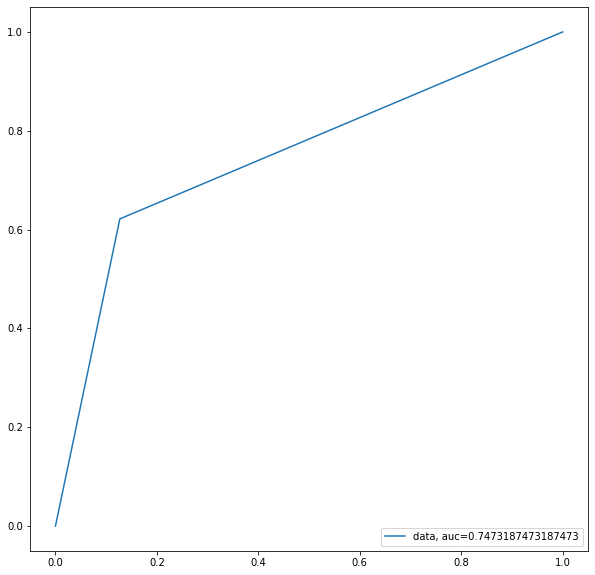

In [265]:
fpr, tpr, _ = metrics.roc_curve(testLabel,predi)
auc = metrics.roc_auc_score(testLabel, predi)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()